In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Torch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
df = pd.read_csv('recruitment_data.csv')
df['id'] = df.index

In [3]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision,id
0,26,1,2,0,3,26.783828,48,78,91,1,1,0
1,39,1,4,12,3,25.862694,35,68,80,2,1,1
2,48,0,2,3,2,9.920805,20,67,13,2,0,2
3,34,1,2,5,2,6.407751,36,27,70,3,0,3
4,30,0,1,6,1,43.105343,23,52,85,2,0,4


In [4]:
df.shape

(1500, 12)

In [5]:
df.isnull().sum()

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
id                     0
dtype: int64

In [6]:
df['EducationLevel'].unique()

array([2, 4, 1, 3], dtype=int64)

In [7]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision,id
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000,749.500000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647,433.157015
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000,374.750000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000,749.500000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000,1124.250000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000,1499.000000


## Boxplot (for outliers)

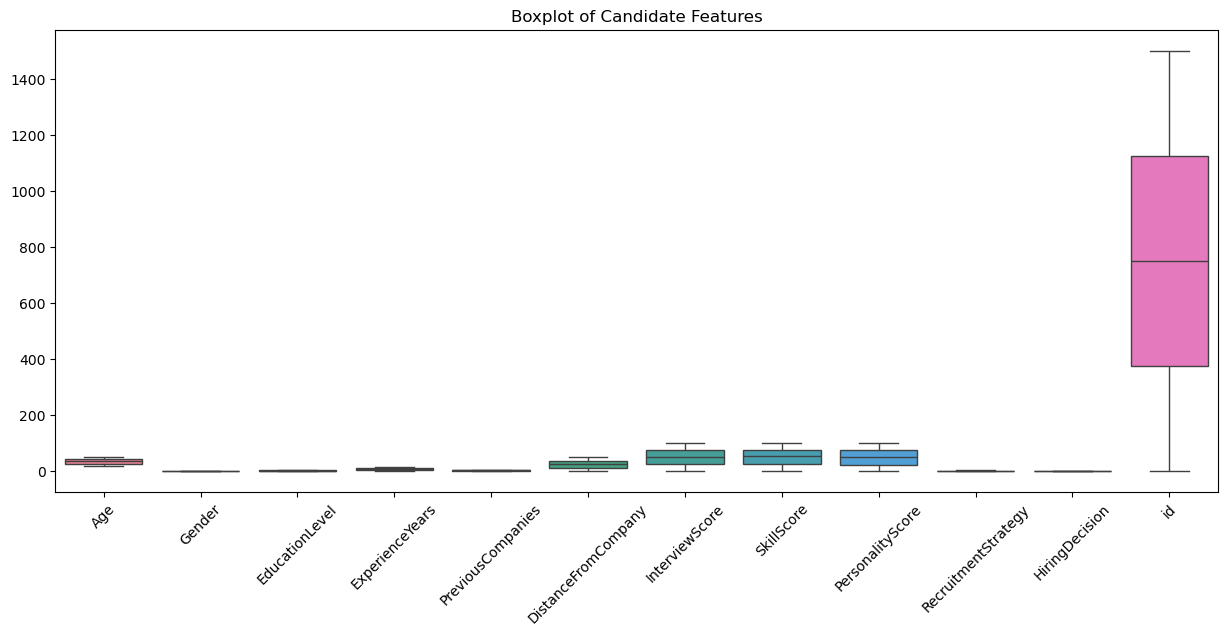

In [9]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df)
plt.title("Boxplot of Candidate Features")
plt.xticks(rotation=45)
plt.show()

<Axes: >

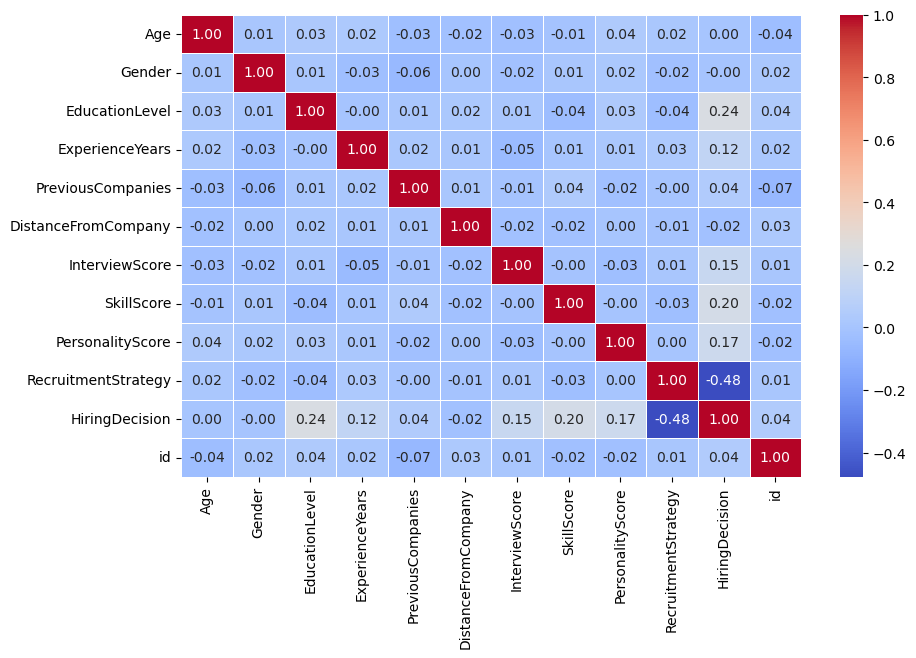

In [10]:
## Heatmap 
corr_matrix = df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
 11  id                   1500 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 140.8 KB


In [12]:
numerical_df = df.copy()
numerical_df.drop(['HiringDecision','id'], axis=1, inplace=True)

df = df[['HiringDecision']]

## Feature Scaling

In [14]:
scaler = StandardScaler()
scaler

StandardScaler()

In [15]:
numerical_df = scaler.fit_transform(numerical_df)
type(numerical_df)

numpy.ndarray

In [16]:
numerical_df = pd.DataFrame(numerical_df, columns=scaler.get_feature_names_out())
numerical_df['id'] = numerical_df.index
type(numerical_df)

pandas.core.frame.DataFrame

In [17]:
numerical_df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,id
0,-0.989083,1.016130,-0.218057,-1.658237,-0.001418,0.087792,-0.089598,0.916174,1.418126,-1.295790,0
1,0.416376,1.016130,2.101694,0.928044,-0.001418,0.024537,-0.543879,0.575386,1.043255,0.154721,1
2,1.389387,-0.984126,-0.218057,-1.011667,-0.710538,-1.070200,-1.068049,0.541307,-1.240051,0.154721,2
3,-0.124185,1.016130,-0.218057,-0.580620,-0.710538,-1.311444,-0.508934,-0.821844,0.702463,1.605233,3
4,-0.556634,-0.984126,-1.377932,-0.365097,-1.419657,1.208598,-0.963215,0.030126,1.213651,0.154721,4


In [18]:
print("Means after scaling:\n", numerical_df.mean().round(5))
print("Standard deviations after scaling:\n", numerical_df.std().round(5))

Means after scaling:
 Age                      0.0
Gender                   0.0
EducationLevel          -0.0
ExperienceYears          0.0
PreviousCompanies        0.0
DistanceFromCompany     -0.0
InterviewScore          -0.0
SkillScore               0.0
PersonalityScore         0.0
RecruitmentStrategy      0.0
id                     749.5
dtype: float64
Standard deviations after scaling:
 Age                      1.00033
Gender                   1.00033
EducationLevel           1.00033
ExperienceYears          1.00033
PreviousCompanies        1.00033
DistanceFromCompany      1.00033
InterviewScore           1.00033
SkillScore               1.00033
PersonalityScore         1.00033
RecruitmentStrategy      1.00033
id                     433.15702
dtype: float64


In [19]:
numerical_df.shape

(1500, 11)

In [20]:
df = df.join(numerical_df, how='inner')
df.shape

(1500, 12)

In [21]:
df.columns

Index(['HiringDecision', 'Age', 'Gender', 'EducationLevel', 'ExperienceYears',
       'PreviousCompanies', 'DistanceFromCompany', 'InterviewScore',
       'SkillScore', 'PersonalityScore', 'RecruitmentStrategy', 'id'],
      dtype='object')

## Unsupervised Learning

In [23]:
X = df.drop(columns=['id', 'HiringDecision'], errors='ignore')

In [24]:
X.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,-0.989083,1.016130,-0.218057,-1.658237,-0.001418,0.087792,-0.089598,0.916174,1.418126,-1.295790
1,0.416376,1.016130,2.101694,0.928044,-0.001418,0.024537,-0.543879,0.575386,1.043255,0.154721
2,1.389387,-0.984126,-0.218057,-1.011667,-0.710538,-1.070200,-1.068049,0.541307,-1.240051,0.154721
3,-0.124185,1.016130,-0.218057,-0.580620,-0.710538,-1.311444,-0.508934,-0.821844,0.702463,1.605233
4,-0.556634,-0.984126,-1.377932,-0.365097,-1.419657,1.208598,-0.963215,0.030126,1.213651,0.154721


In [25]:
''' Train-Test Split '''
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [26]:
X_train_index = X_train.index
X_test_index = X_test.index

In [27]:
type(X_train), type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [28]:
len(X_train), len(X_test)

(1200, 300)

In [29]:
''' Convert to Tensors '''
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

In [30]:
type(X_train_tensor), type(X_test_tensor)

(torch.Tensor, torch.Tensor)

In [31]:
# ''' Employer Preferences '''
# employer_pref = X.mean().values.reshape(1,-1)
# employer_tensor = torch.tensor(employer_pref, dtype=torch.float32)

In [32]:
# type(employer_tensor)

In [33]:
## Neural Network Model
class CandidateRecommender(nn.Module):
    def __init__(self, input_dim):
        super(CandidateRecommender, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

In [34]:
## Initializing the model
input_dim = X_train.shape[1]
model_0 = CandidateRecommender(input_dim)
model_0

CandidateRecommender(
  (fc1): Linear(in_features=10, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [35]:
''' Important Parameters '''
learning_rate = 0.01
epochs = 20

In [36]:
''' Loss Function and Optimizer '''
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=learning_rate)

In [37]:
for epoch in range(epochs):
    predictions = model_0(X_train_tensor)
    loss = loss_function(predictions, torch.ones_like(predictions))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 1.8270
Epoch 1, Loss: 1.6336
Epoch 2, Loss: 1.4647
Epoch 3, Loss: 1.3119
Epoch 4, Loss: 1.1709
Epoch 5, Loss: 1.0364
Epoch 6, Loss: 0.9047
Epoch 7, Loss: 0.7753
Epoch 8, Loss: 0.6495
Epoch 9, Loss: 0.5302
Epoch 10, Loss: 0.4203
Epoch 11, Loss: 0.3238
Epoch 12, Loss: 0.2449
Epoch 13, Loss: 0.1876
Epoch 14, Loss: 0.1544
Epoch 15, Loss: 0.1444
Epoch 16, Loss: 0.1525
Epoch 17, Loss: 0.1688
Epoch 18, Loss: 0.1824
Epoch 19, Loss: 0.1856


In [38]:
with torch.no_grad():
    scores = model_0(X_train_tensor).flatten()

    ranking_df = pd.DataFrame({
        'id': X_train_index,  # Ensure IDs are stored correctly
        'score': scores.numpy()
    })

    # Sort candidates based on score
    ranked_candidates = ranking_df.sort_values(by='score', ascending=False)

    print(ranked_candidates[['id', 'score']])

        id     score
136    908  2.245500
139    966  2.222336
194   1300  2.182938
704    264  2.179249
620   1450  2.111028
...    ...       ...
199   1048  0.405856
1051    95  0.399914
754    498  0.369437
778    356  0.353943
768   1407  0.264538

[1200 rows x 2 columns]


## Test it on Employer's Preferences 

In [40]:
recruiter_pref = np.array([[30, 1, 3, 5, 2, 10, 85, 80, 75, 2]])
recruiter_pref_scaled = scaler.transform(recruiter_pref)

# Convert to PyTorch tensor
recruiter_tensor = torch.tensor(recruiter_pref_scaled, dtype=torch.float32)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [41]:
type(recruiter_tensor)

torch.Tensor

In [42]:
with torch.no_grad():
    scores = F.cosine_similarity(recruiter_tensor, X_test_tensor)

    ranking_df = pd.DataFrame({
        'id':X_test_index,
        'score':scores
    })

    ranked_candidates = ranking_df.sort_values(by='score', ascending=False)

    print(ranked_candidates[['id','score']].head())
    print(type(ranked_candidates))

       id     score
279  1357  0.874193
80   1034  0.760995
103  1084  0.759664
268  1074  0.674816
282  1232  0.629582
<class 'pandas.core.frame.DataFrame'>
